In [2]:

#### Run imports:
# standard data science imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Statistics imports
from scipy import stats
import statsmodels.api as sm

import csv
import import_ipynb
import pandas as pd

In [79]:
url = "https://archive.ics.uci.edu/static/public/891/data.csv"
df = pd.read_csv(url)

### Feature Engineer Labels for General Health

In [7]:
#definitions variable will be used in RFC table below to view cm matrix results
#1 Excellent
#2 Very good
#3 Good
#4 Fair
#5 Poor
#7 Don’t know/Not Sure 9 Refused
 
definitions = pd.Series([0, "Excellent", "Very good", "Good", "Fair","Poor","UNKNOWN"], dtype="category")

In [9]:

reversefactor = dict(zip(range(7),definitions))
reversefactor

{0: 0,
 1: 'Excellent',
 2: 'Very good',
 3: 'Good',
 4: 'Fair',
 5: 'Poor',
 6: 'UNKNOWN'}

In [14]:
new_df = np.vectorize(reversefactor.get)(df[['GenHlth']])
#y_pred_v = np.vectorize(reversefactor.get)(y_pred)

In [22]:
print(new_df[:5])


[['Poor']
 ['Good']
 ['Poor']
 ['Very good']
 ['Very good']]


In [72]:
#Add new def to df
print(type(new_df))


<class 'numpy.ndarray'>


In [73]:
# Convert to DataFrame
df_GenH_label = pd.DataFrame(new_df, columns=['GenHealth']).reindex()

In [74]:
df_GenH_label.head(2)

,GenHealth
0,Poor
1,Good


In [75]:
df.head(2)

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,1,40,1,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,1,0,0,0,0,25,1,0,0,1,...,0,1,3,0,0,0,0,7,6,1


In [80]:
#Merge 2 dataframes
# Merge DataFrames based on the 'key' column
df_concat = pd.concat([df,df_GenH_label], axis=1)

In [86]:
df_concat[['GenHealth','GenHlth','Diabetes_binary','HighBP','HighChol']].head()

,GenHealth,GenHlth,Diabetes_binary,HighBP,HighChol
0,Poor,5,0,1,1
1,Good,3,0,0,0
2,Poor,5,0,1,1
3,Very good,2,0,1,0
4,Very good,2,0,1,1


Question: How many people with good health have diabetis compared to others
?

In [180]:
#1 filter only People with Diabetis 1 - True
#2 filter only people w/o Diabetis  0 = False No diabetis
#3 Create Bar Chart
has_Diabetis = df_concat['Diabetes_binary'] == 1

In [181]:
has_Diabetis_df = df_concat[has_Diabetis]

In [182]:
has_Diabetis_df.head()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,GenHealth
8,8,1,1,1,1,30,1,0,1,0,...,0,5,30,30,1,0,9,5,1,Poor
10,10,1,0,0,1,25,1,0,0,1,...,0,3,0,0,0,1,13,6,8,Good
13,13,1,1,1,1,28,0,0,0,0,...,0,4,0,0,1,0,11,4,6,Fair
17,17,1,0,0,1,23,1,0,0,1,...,0,2,0,0,0,1,7,5,6,Very good
23,23,1,1,0,1,27,0,0,0,1,...,0,1,0,0,0,0,13,5,4,Excellent


In [183]:
GenHe_has_Diabetis_df = has_Diabetis_df.groupby('GenHealth', as_index=False).agg('count')
GenHe_has_Diabetis_df.head()

,GenHealth,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,Excellent,1140,1140,1140,1140,1140,1140,1140,1140,1140,...,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140
1,Fair,9790,9790,9790,9790,9790,9790,9790,9790,9790,...,9790,9790,9790,9790,9790,9790,9790,9790,9790,9790
2,Good,13457,13457,13457,13457,13457,13457,13457,13457,13457,...,13457,13457,13457,13457,13457,13457,13457,13457,13457,13457
3,Poor,4578,4578,4578,4578,4578,4578,4578,4578,4578,...,4578,4578,4578,4578,4578,4578,4578,4578,4578,4578
4,Very good,6381,6381,6381,6381,6381,6381,6381,6381,6381,...,6381,6381,6381,6381,6381,6381,6381,6381,6381,6381


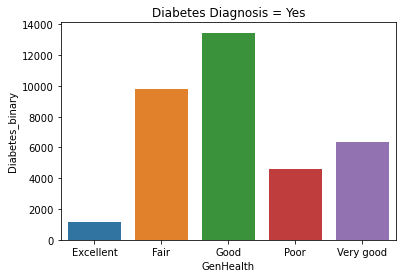

In [184]:
sns.barplot(y='Diabetes_binary', x='GenHealth',data=GenHe_has_Diabetis_df)
 
# Add a title
plt.title("Diabetes Diagnosis = Yes")

plt.show()

Individuals in good health can still get diabetes

In [185]:
df_concat_grp.columns

Index(['GenHealth', 'GenHlth', 'ID', 'Diabetes_binary', 'HighBP', 'HighChol',
       'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [171]:
#1 filter only People with Diabetis 1 - True
#2 filter only people w/o Diabetis  0 = False No diabetis
#3 Create Bar Chart
hasNo_Diabetis = df_concat['Diabetes_binary'] == 0

In [172]:
hasNo_Diabetis_df = df_concat[hasNo_Diabetis]

In [173]:
hasNo_Diabetis_df.head()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,GenHealth
0,0,0,1,1,1,40,1,0,0,0,...,0,5,18,15,1,0,9,4,3,Poor
1,1,0,0,0,0,25,1,0,0,1,...,1,3,0,0,0,0,7,6,1,Good
2,2,0,1,1,1,28,0,0,0,0,...,1,5,30,30,1,0,9,4,8,Poor
3,3,0,1,0,1,27,0,0,0,1,...,0,2,0,0,0,0,11,3,6,Very good
4,4,0,1,1,1,24,0,0,0,1,...,0,2,3,0,0,0,11,5,4,Very good


In [178]:
GenHe_hasNo_Diabetis_df = hasNo_Diabetis_df.groupby('GenHealth', as_index=False).agg('count')
GenHe_hasNo_Diabetis_df.head()

,GenHealth,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,Excellent,44159,44159,44159,44159,44159,44159,44159,44159,44159,...,44159,44159,44159,44159,44159,44159,44159,44159,44159,44159
1,Fair,21780,21780,21780,21780,21780,21780,21780,21780,21780,...,21780,21780,21780,21780,21780,21780,21780,21780,21780,21780
2,Good,62189,62189,62189,62189,62189,62189,62189,62189,62189,...,62189,62189,62189,62189,62189,62189,62189,62189,62189,62189
3,Poor,7503,7503,7503,7503,7503,7503,7503,7503,7503,...,7503,7503,7503,7503,7503,7503,7503,7503,7503,7503
4,Very good,82703,82703,82703,82703,82703,82703,82703,82703,82703,...,82703,82703,82703,82703,82703,82703,82703,82703,82703,82703


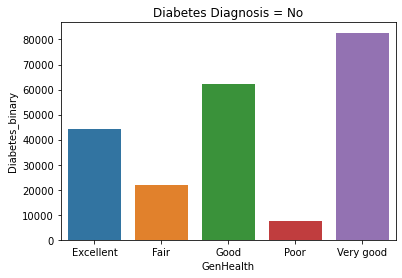

In [179]:
sns.barplot(y='Diabetes_binary', x='GenHealth',data=GenHe_hasNo_Diabetis_df)
 
# Add a title
plt.title("Diabetes Diagnosis = No")

plt.show()

People that are in very good health do not have diabets

### Feature Engineer Labels for Income

In [187]:
#definitions variable will be used in RFC table below to view cm matrix results

 
definitions = pd.Series([0, "<10K", "10-15K", "15-20K", "20-25K","25K-35K","35-50K","50-75K","75>"], dtype="category")

In [188]:

reversefactor = dict(zip(range(7),definitions))
reversefactor

{0: 0,
 1: '<10K',
 2: '10-15K',
 3: '15-20K',
 4: '20-25K',
 5: '25K-35K',
 6: '35-50K'}

In [189]:
new_df = np.vectorize(reversefactor.get)(df[['Income']])
 

In [190]:
print(new_df[:5])


[['15-20K']
 ['<10K']
 ['None']
 ['35-50K']
 ['20-25K']]


In [72]:
#Add new def to df
print(type(new_df))


<class 'numpy.ndarray'>


In [200]:
# Convert to DataFrame
df_income_label = pd.DataFrame(new_df, columns=['income']).reindex()

In [201]:
df_income_label.head(2)

,income
0,15-20K
1,<10K


In [202]:
#Merge 2 dataframes
# Merge DataFrames based on the 'key' column
df_concat = pd.concat([df,df_income_label], axis=1)

In [205]:
df_concat.head()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,income
0,0,0,1,1,1,40,1,0,0,0,...,0,5,18,15,1,0,9,4,3,15-20K
1,1,0,0,0,0,25,1,0,0,1,...,1,3,0,0,0,0,7,6,1,<10K
2,2,0,1,1,1,28,0,0,0,0,...,1,5,30,30,1,0,9,4,8,None
3,3,0,1,0,1,27,0,0,0,1,...,0,2,0,0,0,0,11,3,6,35-50K
4,4,0,1,1,1,24,0,0,0,1,...,0,2,3,0,0,0,11,5,4,20-25K


In [206]:
df_concat[[ 'Income','income','GenHlth','Diabetes_binary','HighBP','HighChol']].head()

,Income,income,GenHlth,Diabetes_binary,HighBP,HighChol
0,3,15-20K,5,0,1,1
1,1,<10K,3,0,0,0
2,8,None,5,0,1,1
3,6,35-50K,2,0,1,0
4,4,20-25K,2,0,1,1


Question: How many people with good health have diabetis compared to others
?

In [207]:
#1 filter only People with Diabetis 1 - True
#2 filter only people w/o Diabetis  0 = False No diabetis
#3 Create Bar Chart
has_Diabetis = df_concat['Diabetes_binary'] == 1

In [208]:
has_Diabetis_df = df_concat[has_Diabetis]

In [209]:
has_Diabetis_df.head()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,income
8,8,1,1,1,1,30,1,0,1,0,...,0,5,30,30,1,0,9,5,1,<10K
10,10,1,0,0,1,25,1,0,0,1,...,0,3,0,0,0,1,13,6,8,None
13,13,1,1,1,1,28,0,0,0,0,...,0,4,0,0,1,0,11,4,6,35-50K
17,17,1,0,0,1,23,1,0,0,1,...,0,2,0,0,0,1,7,5,6,35-50K
23,23,1,1,0,1,27,0,0,0,1,...,0,1,0,0,0,0,13,5,4,20-25K


In [214]:
income_has_Diabetis_df = has_Diabetis_df.groupby('income', as_index=False).agg('count')
income_has_Diabetis_df.head()

,income,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,10-15K,3086,3086,3086,3086,3086,3086,3086,3086,3086,...,3086,3086,3086,3086,3086,3086,3086,3086,3086,3086
1,15-20K,3568,3568,3568,3568,3568,3568,3568,3568,3568,...,3568,3568,3568,3568,3568,3568,3568,3568,3568,3568
2,20-25K,4054,4054,4054,4054,4054,4054,4054,4054,4054,...,4054,4054,4054,4054,4054,4054,4054,4054,4054,4054
3,25K-35K,4504,4504,4504,4504,4504,4504,4504,4504,4504,...,4504,4504,4504,4504,4504,4504,4504,4504,4504,4504
4,35-50K,5291,5291,5291,5291,5291,5291,5291,5291,5291,...,5291,5291,5291,5291,5291,5291,5291,5291,5291,5291


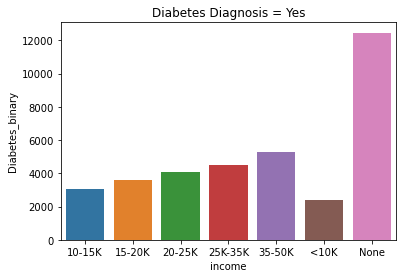

In [215]:
sns.barplot(y='Diabetes_binary', x='income',data=income_has_Diabetis_df)
 
# Add a title
plt.title("Diabetes Diagnosis = Yes")

plt.show()

People in the income range of 35-50K have been diagnosed with diabetis cases

In [216]:
df_concat_grp.columns

Index(['GenHealth', 'GenHlth', 'ID', 'Diabetes_binary', 'HighBP', 'HighChol',
       'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [217]:
#1 filter only People with Diabetis 1 - True
#2 filter only people w/o Diabetis  0 = False No diabetis
#3 Create Bar Chart
hasNo_Diabetis = df_concat['Diabetes_binary'] == 0

In [218]:
hasNo_Diabetis_df = df_concat[hasNo_Diabetis]

In [219]:
hasNo_Diabetis_df.head()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,income
0,0,0,1,1,1,40,1,0,0,0,...,0,5,18,15,1,0,9,4,3,15-20K
1,1,0,0,0,0,25,1,0,0,1,...,1,3,0,0,0,0,7,6,1,<10K
2,2,0,1,1,1,28,0,0,0,0,...,1,5,30,30,1,0,9,4,8,None
3,3,0,1,0,1,27,0,0,0,1,...,0,2,0,0,0,0,11,3,6,35-50K
4,4,0,1,1,1,24,0,0,0,1,...,0,2,3,0,0,0,11,5,4,20-25K


In [220]:
income_hasNo_Diabetis_df = hasNo_Diabetis_df.groupby('income', as_index=False).agg('count')
income_hasNo_Diabetis_df.head()

,income,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,10-15K,8697,8697,8697,8697,8697,8697,8697,8697,8697,...,8697,8697,8697,8697,8697,8697,8697,8697,8697,8697
1,15-20K,12426,12426,12426,12426,12426,12426,12426,12426,12426,...,12426,12426,12426,12426,12426,12426,12426,12426,12426,12426
2,20-25K,16081,16081,16081,16081,16081,16081,16081,16081,16081,...,16081,16081,16081,16081,16081,16081,16081,16081,16081,16081
3,25K-35K,21379,21379,21379,21379,21379,21379,21379,21379,21379,...,21379,21379,21379,21379,21379,21379,21379,21379,21379,21379
4,35-50K,31179,31179,31179,31179,31179,31179,31179,31179,31179,...,31179,31179,31179,31179,31179,31179,31179,31179,31179,31179


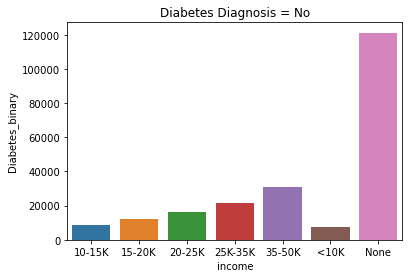

In [221]:
sns.barplot(y='Diabetes_binary', x='income',data=income_hasNo_Diabetis_df)
 
# Add a title
plt.title("Diabetes Diagnosis = No")

plt.show()

Indiduals that make less than 10K are less likely to get diabetes when compared to other income ranges

In [ ]:
income_has_Diabetis_df

### Feature Engineer Labels for Education

In [ ]:
#PhysHlth  DiffWalk  Sex  Age  Education  Income  
#1 Never attended school or only kindergarten  
#2 Grades 1 through 8 (Elementary)   
#3 Grades 9 through 11 (Some high school)   
#4 Grade 12 or GED (High school graduate)   
#5 College 1 year to 3 years (Some college or technical school)   
#6 College 4 years or more (College graduate)   
#9 Refused   
#BLANK Not asked or Missing 1,770

### Export Data for dashboard¶

In [ ]:

### Export each column as a seperate file:
from my_Functions import write_data
write_data(dashboard_data, 'data/prepared', index=True)

In [ ]:
### Export all the data into a single file:
dashboard_data.to_csv('data/prepared/dashboard_data.csv',index=False)

In [ ]:
#Export files for graphing
#GenHe_hasNo_Diabetis_df

#GenHe_has_Diabetis_df

# income_hasNo_Diabetis_df

# income_has_Diabetis_df